# Step potentials
Calculating the solutions to 1-D scattering problems using matrices

In [1]:
from sympy import *

In [25]:
init_printing()

First let's look at a single step located at _x_=0.

In [6]:
V1, V2 = symbols("V1 V2", real=True) # potentials
k1, k2 = symbols("k1 k2") # wavevectors
En = symbols("En", real=True) # energy (E = the number "e")
A1, B1, A2, B2 = symbols("A1 B1 A2 B2") # amplitudes
x = symbols("x", real=True)

Defining our wavefunctions in each region:

In [11]:
psi1 = lambda x: A1*exp(I*k1*x) + B1*exp(-I*k1*x)

In [12]:
psi1(x)

A1*exp(I*k1*x) + B1*exp(-I*k1*x)

In [13]:
psi2 = lambda x: A2*exp(I*k2*x) + B2*exp(-I*k2*x)

In [14]:
psi2(x)

A2*exp(I*k2*x) + B2*exp(-I*k2*x)

The boundary conditions for continuity and continuity of the derivative are

In [20]:
eq1 = Eq(psi1(0),psi2(0))
eq1

Eq(A1 + B1, A2 + B2)

In [21]:
eq2 = Eq(diff(psi1(x),x),diff(psi2(x),x)).subs(x,0)
eq2

Eq(I*A1*k1 - I*B1*k1, I*A2*k2 - I*B2*k2)

So, if we have an incoming wave from the left, we set $A_1 = 1$ and $B_2 = 0$, then solve...

In [22]:
eq1.subs({A1:1, B2:0})

Eq(B1 + 1, A2)

In [23]:
eq2.subs({A1:1, B2:0})

Eq(-I*B1*k1 + I*k1, I*A2*k2)

Solve this directly:

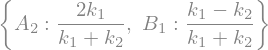

In [26]:
solve([eq1.subs({A1:1, B2:0}), eq2.subs({A1:1, B2:0})],[A2,B1])

Next, recast this in matrix form to allow us to generalize to multiple steps...